In [80]:
# Import libraries
import pandas as pd
import numpy as np
import math
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Read in full Motor Vehicle Collision Dataset
mvc_df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')

C:\Users\pawan\AppData\Local\Temp\ipykernel_6512\3333524029.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  mvc_df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')


In [43]:
# Output column names
mvc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026647 entries, 0 to 2026646
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [205]:
mvc_df_cleaned = mvc_df.dropna(axis='index', how='any', subset=['CRASH DATE',
                                                                'CRASH TIME',
                                                                'BOROUGH',
                                                                'ZIP CODE',                                                                
                                                                'LOCATION',
                                                                'CROSS STREET NAME',                                                                
                                                                'NUMBER OF PERSONS INJURED',
                                                                'NUMBER OF PERSONS KILLED',
                                                                'NUMBER OF PEDESTRIANS INJURED',
                                                                'NUMBER OF PEDESTRIANS KILLED',
                                                                'NUMBER OF MOTORIST INJURED',
                                                                'NUMBER OF MOTORIST KILLED',
                                                                'CONTRIBUTING FACTOR VEHICLE 1',
                                                                'VEHICLE TYPE CODE 1'])
print(f"Num entries: {len(mvc_df_cleaned)}")
#mvc_df_cleaned.to_csv('pawan_cleaned_mvc_data.csv')

Num entries: 1056762


In [206]:
mvc_df_cleaned.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.056762e+06,1.056762e+06,1.056762e+06,1.056762e+06,1.056762e+06,1.056762e+06,1.056762e+06,1.056762e+06,1.056762e+06,1.056762e+06,1.056762e+06
mean,4.064894e+01,-7.379017e+01,3.096979e-01,1.483778e-03,6.485472e-02,8.081290e-04,3.138834e-02,1.353190e-04,2.102810e-01,5.176189e-04,2.616384e+06
std,1.723732e+00,3.127008e+00,6.957090e-01,4.073671e-02,2.612600e-01,2.920443e-02,1.761897e-01,1.171296e-02,6.499297e-01,2.469995e-02,1.708759e+06
min,0.000000e+00,-7.425496e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066686e+01,-7.397769e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.096902e+05
50%,4.071918e+01,-7.393112e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.341752e+06
75%,4.076548e+01,-7.387162e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.981608e+06
max,4.091247e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.663396e+06


CRASH DATE       LATITUDE  \
BOROUGH                                                             
BRONX         count                         146532  146532.000000   
              mean   2016-11-24 11:36:06.014249472      40.761238   
              min              2012-07-01 00:00:00       0.000000   
              25%              2014-05-24 00:00:00      40.826874   
              50%              2016-05-12 00:00:00      40.845411   
              75%              2019-02-13 00:00:00      40.868283   
              max              2023-09-16 00:00:00      40.912468   
              std                              NaN       1.883057   
BROOKLYN      count                         329539  329539.000000   
              mean   2016-09-06 09:11:34.493822976      40.577211   
              min              2012-07-01 00:00:00       0.000000   
              25%              2014-04-10 00:00:00      40.631300   
              50%              2015-12-14 00:00:00      40.657769   
              75%              2018-10-21 00:00:00      40.681137   
              max              2023-09-16 00:00:00      40.895374   
              std                              NaN       1.787486   
MANHATTAN     count                         245295  245295.000000   
              mean   2016-02-18 07:33:28.277380352      40.709210   
              min              2012-07-01 00:00:00       0.000000   
              25%              2013-12-25 00:00:00      40.740185   
              50%              2015-07-06 00:00:00      40.759163   
              75%              2017-11-21 00:00:00      40.784408   
              max              2023-09-16 00:00:00      40.904600   
              std                              NaN       1.503650   
QUEENS        count                         288735  288735.000000   
              mean   2016-10-17 09:59:30.600031488      40.643804   
              min              2012-07-01 00:00:00       0.000000   
              25%              2014-05-14 00:00:00      40.691372   
              50%              2016-02-13 00:00:00      40.723080   
              75%              2018-12-18 00:00:00      40.751502   
              max              2023-09-16 00:00:00      40.878338   
              std                              NaN       1.741763   
STATEN ISLAND count                          46661   46661.000000   
              mean   2016-04-13 18:44:36.102097920      40.517894   
              min              2012-07-01 00:00:00       0.000000   
              25%              2013-11-05 00:00:00      40.559368   
              50%              2015-08-28 00:00:00      40.590340   
              75%              2018-03-14 00:00:00      40.616415   
              max              2023-09-16 00:00:00      40.846700   
              std                              NaN       1.679543   

                         LONGITUDE  NUMBER OF PERSONS INJURED  \
BOROUGH                                                         
BRONX         count  146532.000000              146532.000000   
              mean      -73.726682                   0.351282   
              min       -74.070970                   0.000000   
              25%       -73.907531                   0.000000   
              50%       -73.889275                   0.000000   
              75%       -73.861360                   1.000000   
              max         0.000000                  20.000000   
              std         3.405774                   0.763806   
BROOKLYN      count  329539.000000              329539.000000   
              mean      -73.808311                   0.356550   
              min       -74.145775                   0.000000   
              25%       -73.980730                   0.000000   
              50%       -73.952670                   0.000000   
              75%       -73.924030                   1.000000   
              max         0.000000                  43.000000   
              std         3.250969  

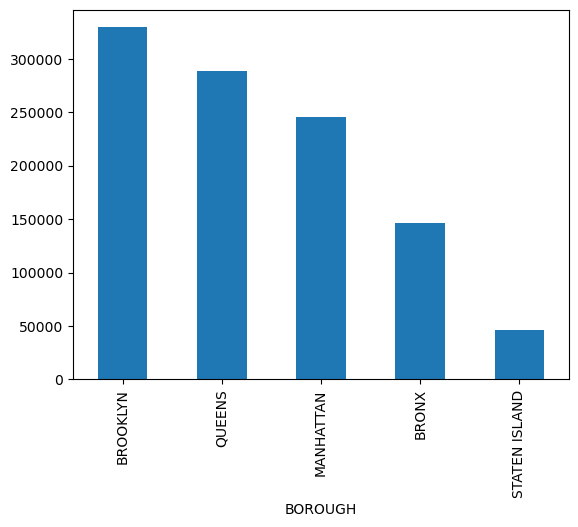

In [255]:
#display(mvc_df_cleaned.groupby('BOROUGH').describe())
mvc_df_cleaned['BOROUGH'].value_counts().plot.bar()
mvc_df_cleaned.groupby('BOROUGH').describe().stack()

<Axes: xlabel='NUMBER OF CYCLIST INJURED', ylabel='NUMBER OF PERSONS INJURED'>

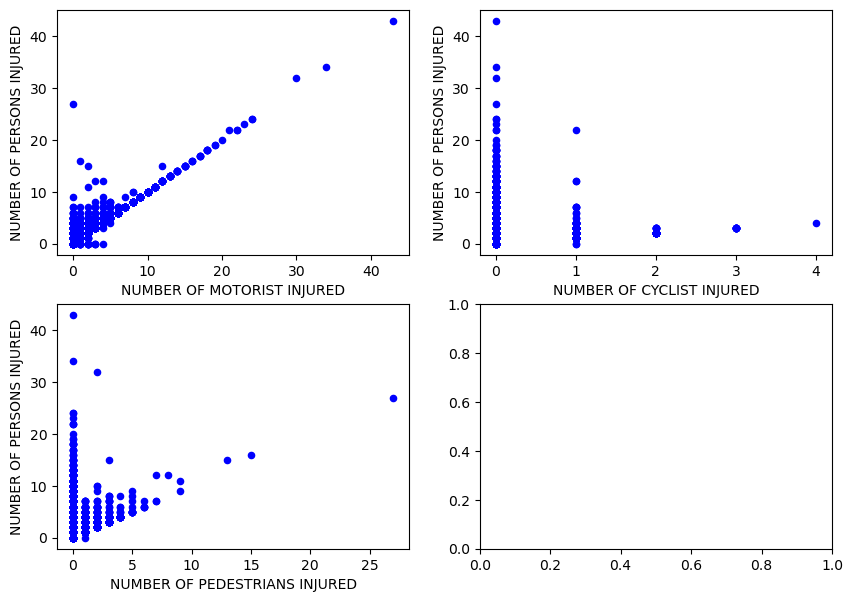

In [99]:
fig, ax = plt.subplots(2,2)
mvc_df_cleaned.plot(kind='scatter', x='NUMBER OF MOTORIST INJURED', y = 'NUMBER OF PERSONS INJURED', color='blue', figsize=(10,7), ax=ax[0][0])
mvc_df_cleaned.plot(kind='scatter', x='NUMBER OF PEDESTRIANS INJURED', y = 'NUMBER OF PERSONS INJURED', color='blue', figsize=(10,7), ax=ax[1][0])
mvc_df_cleaned.plot(kind='scatter', x='NUMBER OF CYCLIST INJURED', y = 'NUMBER OF PERSONS INJURED', color='blue', figsize=(10,7), ax=ax[0][1])

<Axes: xlabel='NUMBER OF CYCLIST KILLED', ylabel='NUMBER OF PERSONS KILLED'>

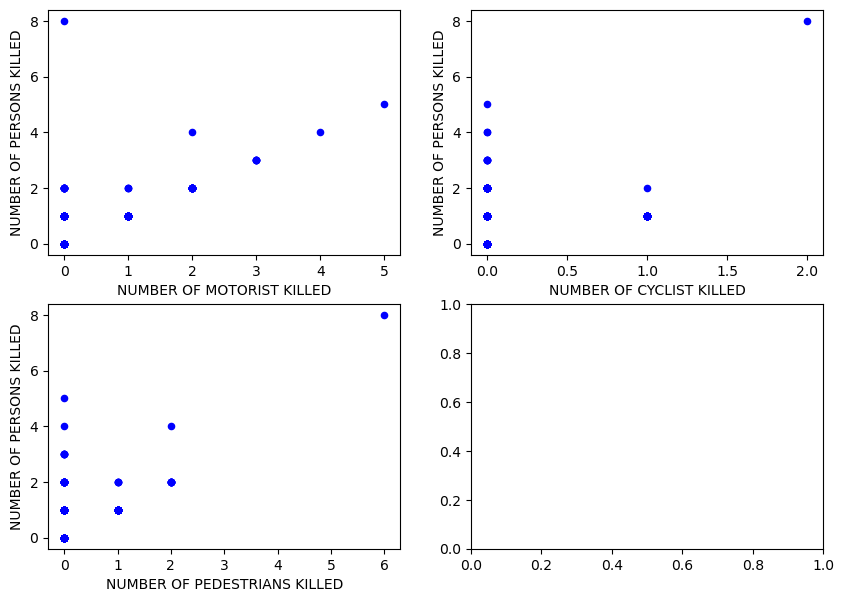

In [100]:
fig, ax = plt.subplots(2,2)
mvc_df_cleaned.plot(kind='scatter', x='NUMBER OF MOTORIST KILLED', y = 'NUMBER OF PERSONS KILLED', color='blue', figsize=(10,7), ax=ax[0][0])
mvc_df_cleaned.plot(kind='scatter', x='NUMBER OF PEDESTRIANS KILLED', y = 'NUMBER OF PERSONS KILLED', color='blue', figsize=(10,7), ax=ax[1][0])
mvc_df_cleaned.plot(kind='scatter', x='NUMBER OF CYCLIST KILLED', y = 'NUMBER OF PERSONS KILLED', color='blue', figsize=(10,7), ax=ax[0][1])

<Axes: xlabel='NUMBER OF PERSONS INJURED', ylabel='BOROUGH'>

<Axes: xlabel='NUMBER OF PERSONS KILLED', ylabel='BOROUGH'>

<Axes: xlabel='NUMBER OF MOTORIST INJURED', ylabel='BOROUGH'>

<Axes: xlabel='NUMBER OF MOTORIST KILLED', ylabel='BOROUGH'>

<Axes: xlabel='NUMBER OF CYCLIST INJURED', ylabel='BOROUGH'>

<Axes: xlabel='NUMBER OF CYCLIST KILLED', ylabel='BOROUGH'>

<Axes: xlabel='NUMBER OF PEDESTRIANS INJURED', ylabel='BOROUGH'>

<Axes: xlabel='NUMBER OF PEDESTRIANS KILLED', ylabel='BOROUGH'>

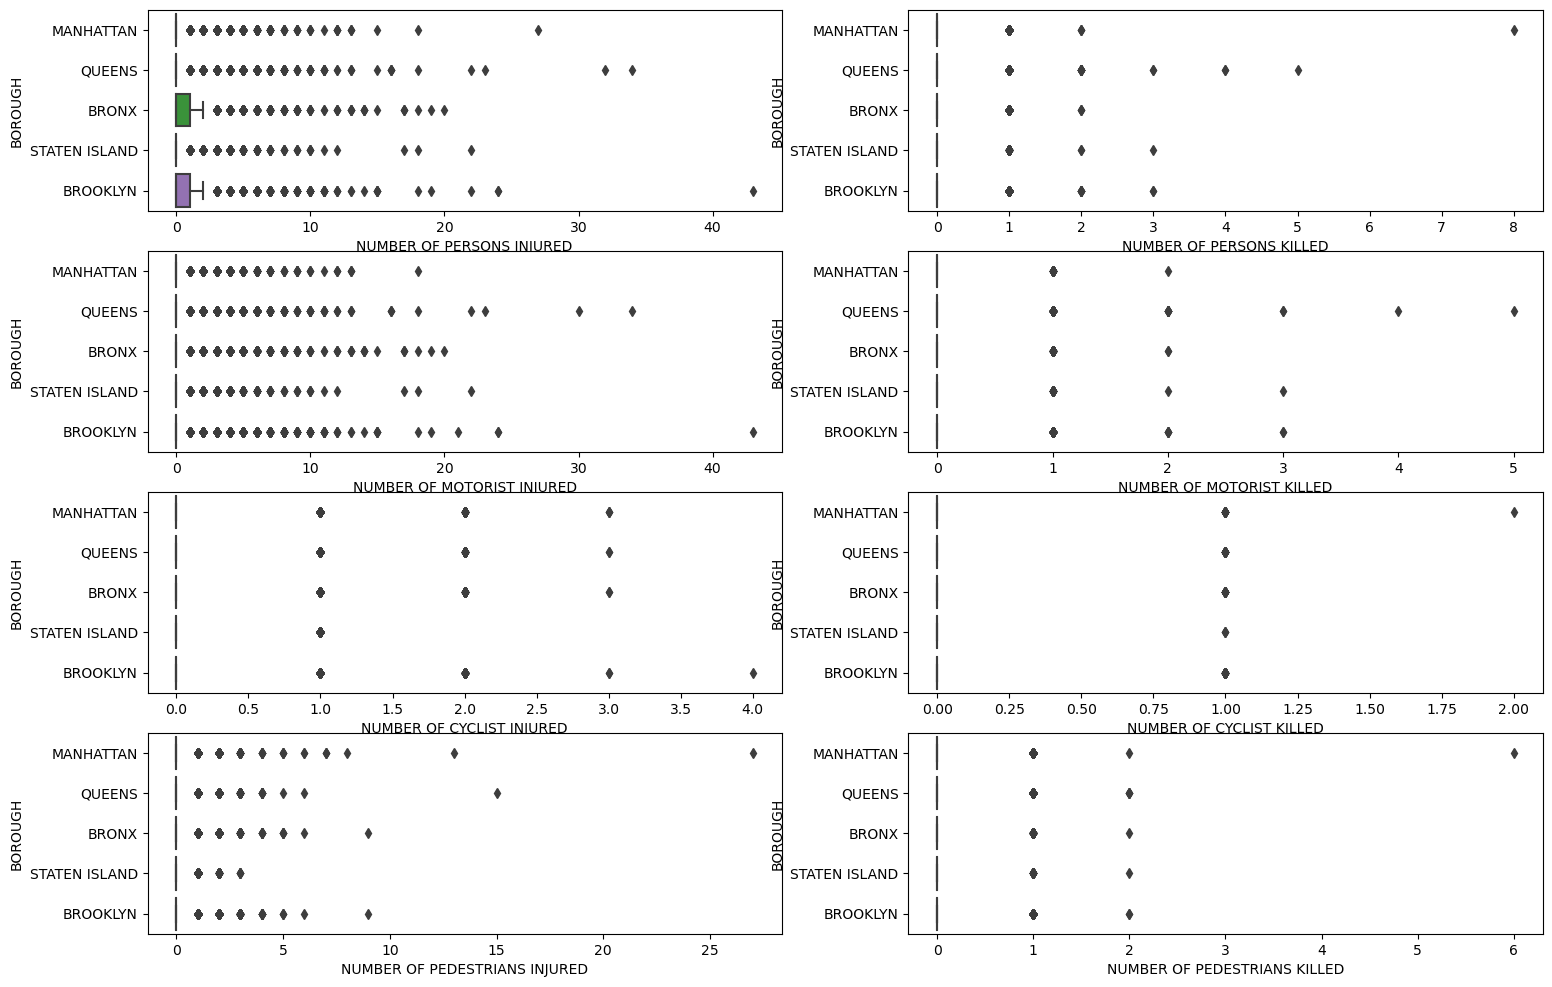

In [109]:
fig, ax = plt.subplots(4, 2 , figsize=(18,12))
display(sns.boxplot(y='BOROUGH', x='NUMBER OF PERSONS INJURED', data=mvc_df_cleaned, orient='h', ax=ax[0][0]))
display(sns.boxplot(y='BOROUGH', x='NUMBER OF PERSONS KILLED', data=mvc_df_cleaned, orient='h', ax=ax[0][1]))
display(sns.boxplot(y='BOROUGH', x='NUMBER OF MOTORIST INJURED', data=mvc_df_cleaned, orient='h', ax=ax[1][0]))
display(sns.boxplot(y='BOROUGH', x='NUMBER OF MOTORIST KILLED', data=mvc_df_cleaned, orient='h', ax=ax[1][1]))
display(sns.boxplot(y='BOROUGH', x='NUMBER OF CYCLIST INJURED', data=mvc_df_cleaned, orient='h', ax=ax[2][0]))
display(sns.boxplot(y='BOROUGH', x='NUMBER OF CYCLIST KILLED', data=mvc_df_cleaned, orient='h', ax=ax[2][1]))
display(sns.boxplot(y='BOROUGH', x='NUMBER OF PEDESTRIANS INJURED', data=mvc_df_cleaned, orient='h', ax=ax[3][0]))
display(sns.boxplot(y='BOROUGH', x='NUMBER OF PEDESTRIANS KILLED', data=mvc_df_cleaned, orient='h', ax=ax[3][1]))

In [183]:
mvc_df_cleaned[['CRASH TIME HR', 'CRASH TIME MIN']] = mvc_df_cleaned['CRASH TIME'].str.split(":", n=1, expand=True)
mvc_df_cleaned['CRASH TIME HR'] = mvc_df_cleaned['CRASH TIME HR'].astype(int)
mvc_df_cleaned['CRASH TIME MIN'] = mvc_df_cleaned['CRASH TIME MIN'].astype(int)


C:\Users\pawan\AppData\Local\Temp\ipykernel_6512\367989541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvc_df_cleaned[['CRASH TIME HR', 'CRASH TIME MIN']] = mvc_df_cleaned['CRASH TIME'].str.split(":", n=1, expand=True)
C:\Users\pawan\AppData\Local\Temp\ipykernel_6512\367989541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvc_df_cleaned['CRASH TIME HR'] = mvc_df_cleaned['CRASH TIME HR'].astype(int)
C:\Users\pawan\AppData\Local\Temp\ipykernel_6512\367989541.py:3: SettingWithCopyWarning: 
A valu

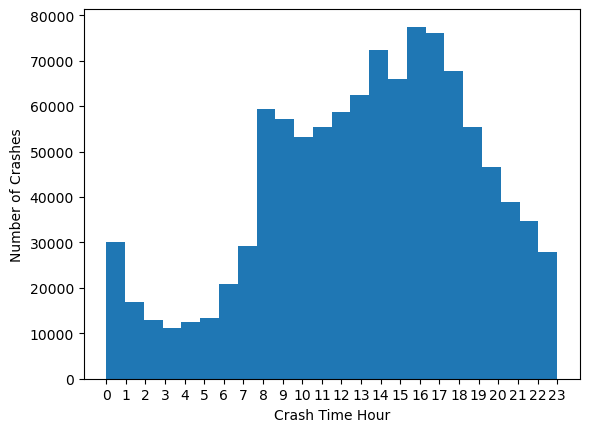

In [184]:
plt.hist(mvc_df_cleaned['CRASH TIME HR'], bins=24)
plt.xticks(np.arange(0, 24))
plt.xlabel("Crash Time Hour")
plt.ylabel("Number of Crashes")
plt.show()

In [241]:
from datetime import datetime
date_format = '%m/%d/%Y'

mvc_df_cleaned['CRASH DATE'] = pd.to_datetime(mvc_df_cleaned['CRASH DATE'])
mvc_df_cleaned['DAY OF WEEK'] = mvc_df_cleaned['CRASH DATE'].dt.day_of_week



C:\Users\pawan\AppData\Local\Temp\ipykernel_6512\1240060932.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvc_df_cleaned['CRASH DATE'] = pd.to_datetime(mvc_df_cleaned['CRASH DATE'])
C:\Users\pawan\AppData\Local\Temp\ipykernel_6512\1240060932.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvc_df_cleaned['DAY OF WEEK'] = mvc_df_cleaned['CRASH DATE'].dt.day_of_week


<Axes: xlabel='DAY OF WEEK'>

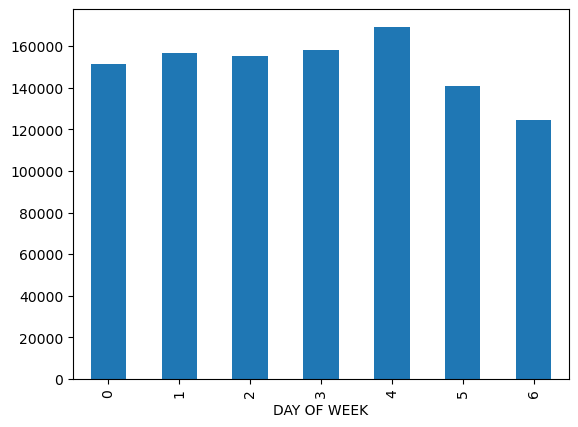

In [253]:
mvc_df_cleaned['DAY OF WEEK'].value_counts().sort_index().plot.bar()

In [ ]:
now.strftime("")